# Chapter 02

In [2]:
import pint
ureg = pint.UnitRegistry()

# import numpy as np

from sympy import *
init_printing()

# force plots to display in notebook, not new window
# %matplotlib inline

## Problem 2.24

The following empirical equation correlates the values of variables in a system in which solid particles are suspended in a flowing gas:

In [3]:
kg, dp, y, D = symbols('kg dp y D')
mu, rho, u = symbols('mu rho u')

In [4]:
kg * dp * y / D

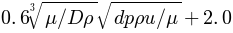

In [5]:
2.00+0.600*cbrt(mu/(rho*D))*sqrt(dp*u*rho/mu)

Both $(mu / (rho*D))$ and $(dp * u * rho / mu)$ are dimensionless groups; kg is a coefficient that expresses the rate at which a particular species transfers from the gas to the soild particles; and the coefficients 2.00 and0.600 are dimensionless constants obtained by fitting experimental data covering a wide range of values of teh equation variables.

The value of kg is needed to design a catalytic reactor. Since this coefficient is difficult to determine directly, values of the other variables are measured or estimated and kg is calcualted from the given correlation. The variable values are as follows:

In [6]:
dp = 5.00 * ureg.millimeters
y = 0.100 * ureg.dimensionless
D = 0.100 * ureg.centimeters**2/ureg.second
mu = 1*10**(-5) * ureg.newton * ureg.second / ureg.meter**2
rho = 1*10**(-3) * ureg.gram / ureg.centimeter**3
u = 10 * ureg.meter / ureg.second

In [7]:
# convert to the same system (cm, kg, s) and convert N
dp.ito(ureg.centimeter)
mu.ito(ureg.kilogram/ureg.centimeter/ureg.second)
rho.ito(ureg.kilogram/ureg.centimeter**3)
u.ito(ureg.centimeter/ureg.second)
print("mu is", mu)
print("rho is", rho)
print("D is", D)

print("dp is", dp)
print("u is", u)
print("rho is", rho)
print("mu is", mu)

mu is 1.0000000000000001e-07 kilogram / centimeter / second
rho is 1e-06 kilogram / centimeter ** 3
D is 0.1 centimeter ** 2 / second
dp is 0.5 centimeter
u is 1000.0 centimeter / second
rho is 1e-06 kilogram / centimeter ** 3
mu is 1.0000000000000001e-07 kilogram / centimeter / second


In [21]:
# verify demensions match (should be unitless and dimensionless)
# first term
if ((mu/(rho*D)).dimensionality == ureg.dimensionless and 
    (mu/(rho*D)).units == ureg.dimensionless):
    print("my/(rho*D) has correct units and dimensions")
else:
    print("mu/(rho*D) has incorrect units and/or dimensions")
    
# second term
if ((dp*u*rho/mu).dimensionality == ureg.dimensionless and 
    (dp*u*rho/mu).units == ureg.dimensionless):
    print("dp*u*rho/mu has correct units and dimensions")
else:
    print("dp*u*rho/mu has incorrect units and/or dimensions")

my/(rho*D) has correct units and dimensions
dp*u*rho/mu has correct units and dimensions


(a) what is the estimated value of kg? Give its value and units

In [9]:
kg = (2.00 + 0.600*((mu/(rho*D))**(1/3))*((dp*u*rho/mu)**(1/2)))*(D/(dp*y))

In [10]:
kg.to(ureg.meter/ureg.second)

<Quantity(0.8885281374238571, 'meter / second')>

(b) why might the true value of kg in the reactor be significantly different from the value estimated in part (a)? Give serveral possible answers

(c) Create a spreadsheet in which up to five sets of values of the given variables (dp through u) are entered in the columns and the corresponding valyues of kg are calcualted. Test your program using the following variable sets

(i) values given above

In [11]:
kg.to(ureg.meter/ureg.second)

<Quantity(0.8885281374238571, 'meter / second')>

(ii) as above, only double the particle diameter dp (maing it 10.00 mm)

In [12]:
dp2 = 2*dp
kg = (2.00 + 0.600*((mu/(rho*D))**(1/3))*((dp2*u*rho/mu)**(1/2)))*(D/(dp2*y))
kg.to(ureg.meter/ureg.second)

<Quantity(0.62, 'meter / second')>

(iii) as above only double the diffusivity D|

In [13]:
D2 = 2*D
kg = (2.00 + 0.600*((mu/(rho*D2))**(1/3))*((dp*u*rho/mu)**(1/2)))*(D2/(dp*y))
kg.to(ureg.meter/ureg.second)

<Quantity(1.4269544579712476, 'meter / second')>

(iv) as above only double the viscosity, mu

In [14]:
mu2 = 2*mu
kg = (2.00 + 0.600*((mu2/(rho*D))**(1/3))*((dp*u*rho/mu2)**(1/2)))*(D/(dp*y))
kg.to(ureg.meter/ureg.second)

<Quantity(0.7959526299369238, 'meter / second')>

(v) as above only double the velocity, u

In [15]:
u2 = 2*u
kg = (2.00 + 0.600*((mu/(rho*D))**(1/3))*((dp*u2*rho/mu)**(1/2)))*(D/(dp*y))
kg.to(ureg.meter/ureg.second)

<Quantity(1.24, 'meter / second')>